<a href="https://colab.research.google.com/github/adenikeadewumi/ML-Projects/blob/main/Handwritten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handwriting Digit(0-9) classificatiion with efficientnet_b0

In [12]:
#Import libraries and MNIST dataset using pytorch

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn


transform = transforms.Compose([
    transforms.Resize((224, 224)),                    # Resize to EfficientNet input size
    transforms.Grayscale(num_output_channels=3),      # Convert 1 channel → 3 channels
    transforms.ToTensor() # Transform to convert PIL images to Tensors
])

# Download and load training data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load test data
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Select Pretrained model to use

In [13]:
#Load pretrained model to be used for trasfer learning
import torchvision.models as models
model= models.efficientnet_b0(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
#View present architecture of model

model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [15]:
#Change the output from 1000 classes to 10 classes
model.classifier[1]= nn.Linear(model.classifier[1].in_features, 10)

In [16]:
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

#Create the optimizer, criterion to be used and also set the num of epochs for training to 5
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
num_epochs = 5

#define function to train model
def train_model():
    model.train() #Set model to training mode. This is actually very important as it tells the model to be ready for changes
    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:#Loop through each instance of the train data
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Clears old gradients from the previous step before the backward pass
            outputs = model(images)#Make predictions with the model in order to get it's state of accuracy

            loss = criterion(outputs, labels)#This is the loss function. It compares the accuracy of the output gotten from model to that of the actual model
            loss.backward() #Perform backward propagation

            optimizer.step()#Update the weights

            running_loss += loss.item()#keep track of model's loss

        avg_loss = running_loss / len(train_loader)#Get the average loss for the current epoch and print it out
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Call the training function
train_model()


Epoch [1/5], Loss: 0.0767
Epoch [2/5], Loss: 0.0336
Epoch [3/5], Loss: 0.0261
Epoch [4/5], Loss: 0.0229
Epoch [5/5], Loss: 0.0200


In [19]:
#evaluate model
def evaluate_model():
  #Set model to evaluation mode
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():#
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)# Get the index of the class with the highest score

            total += labels.size(0)# keep track of the number of samples
            correct += (predicted == labels).sum().item()#Keep track of those the model predicted right

    accuracy = 100 * correct / total#Calculate and print model accuracy
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate_model()


Test Accuracy: 99.45%


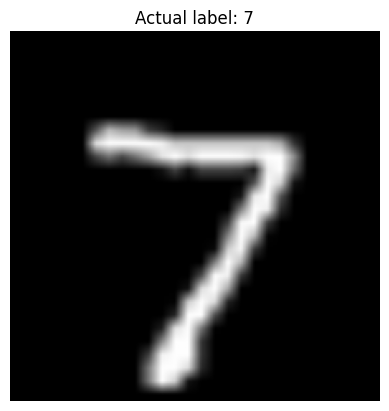

Predicted label: 7




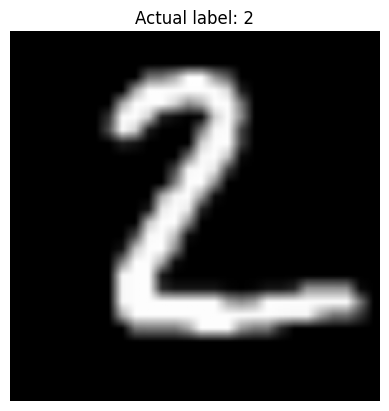

Predicted label: 2




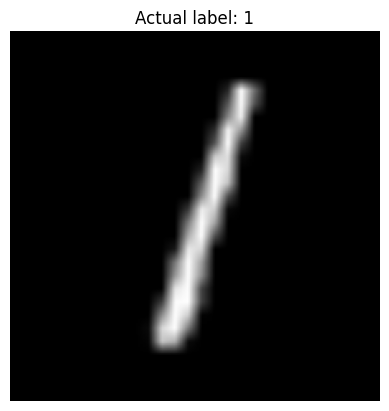

Predicted label: 1




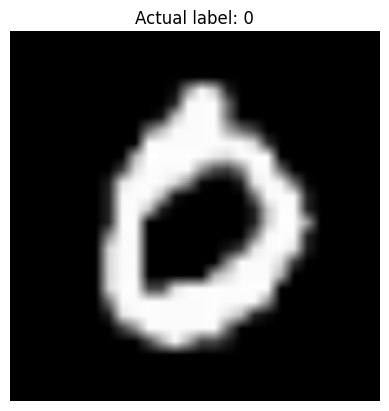

Predicted label: 0




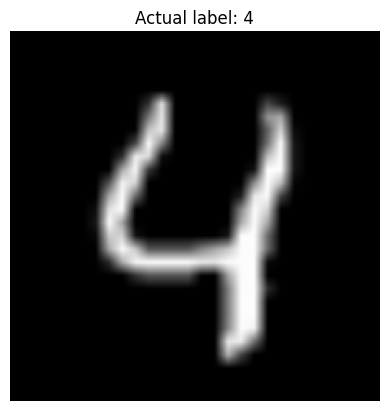

Predicted label: 4




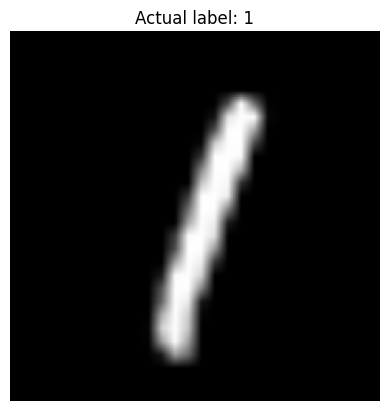

Predicted label: 1




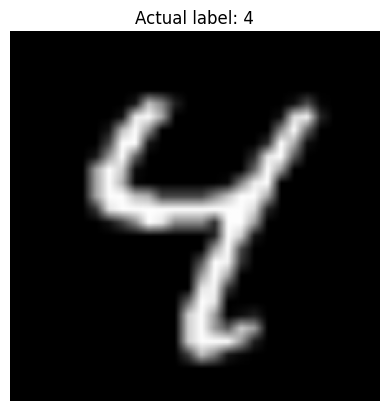

Predicted label: 4




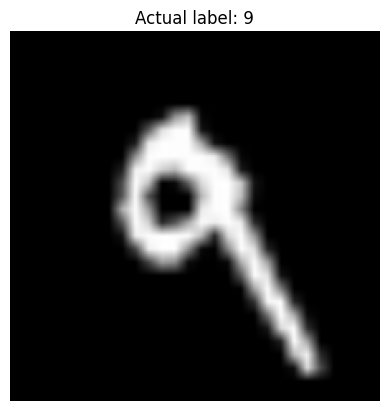

Predicted label: 9




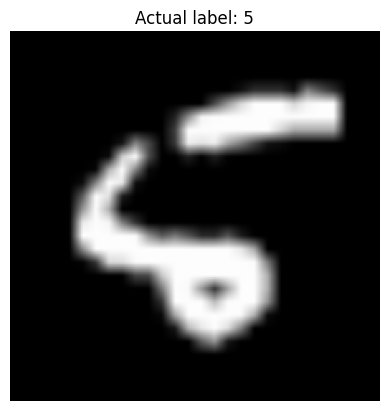

Predicted label: 5




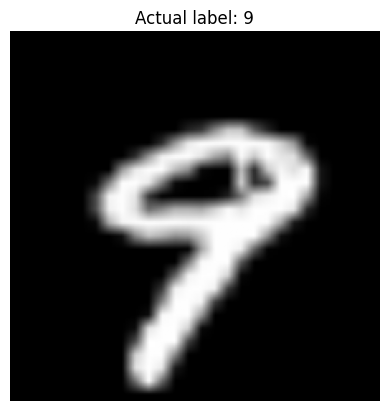

Predicted label: 9




In [24]:
import matplotlib.pyplot as plt
#Check prediction for 10 images
for i in range(10):
    image, label = test_dataset[i]# Extract data from test_dataset
    plt.imshow(image.permute(1, 2, 0).squeeze(), cmap="gray")#Show the image chosen
    plt.title(f"Actual label: {label}")
    plt.axis('off')
    plt.show()

    input_tensor = image.unsqueeze(0).to(device)

    with torch.no_grad():  # Disable gradient tracking
        output = model(input_tensor)  # Forward pass
        predicted_class = torch.argmax(output, dim=1).item()  # Get predicted label

    print(f"Predicted label: {predicted_class}")
    print()
    print()

